# Predict Bike Sharing Demand with AutoGluon Template

## Project: Predict Bike Sharing Demand with AutoGluon
This notebook is a template with each step that you need to complete for the project.

Please fill in your code where there are explicit `?` markers in the notebook. You are welcome to add more cells and code as you see fit.

Once you have completed all the code implementations, please export your notebook as a HTML file so the reviews can view your code. Make sure you have all outputs correctly outputted.

`File-> Export Notebook As... -> Export Notebook as HTML`

There is a writeup to complete as well after all code implememtation is done. Please answer all questions and attach the necessary tables and charts. You can complete the writeup in either markdown or PDF.

Completing the code template and writeup template will cover all of the rubric points for this project.

The rubric contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this notebook and also discuss the results in the writeup file.

## Step 1: Create an account with Kaggle

### Create Kaggle Account and download API key
Below is example of steps to get the API username and key. Each student will have their own username and key.

1. Open account settings.
<!-- ![kaggle1.png](attachment:kaggle1.png) -->
<!-- ![kaggle2.png](attachment:kaggle2.png) -->
2. Scroll down to API and click Create New API Token.
<!-- ![kaggle3.png](attachment:kaggle3.png)
![kaggle4.png](attachment:kaggle4.png) -->
3. Open up `kaggle.json` and use the username and key.
<!-- ![kaggle5.png](attachment:kaggle5.png) -->

## Step 2: Download the Kaggle dataset using the kaggle python library

### Open up Sagemaker Studio and use starter template

1. Notebook should be using a `ml.t3.medium` instance (2 vCPU + 4 GiB)
2. Notebook should be using kernal: `Python 3 (MXNet 1.8 Python 3.7 CPU Optimized)`

### Install packages

In [50]:
!uv pip install -U pip
!uv pip install -U setuptools wheel
!uv pip install -U "mxnet<2.0.0" bokeh==2.0.1
!uv pip install autogluon --no-cache-dir
# Without --no-cache-dir, smaller aws instances may have trouble installing

Using Python 3.11.13 environment at: /usr
Resolved 1 package in 75ms
Audited 1 package in 0.51ms
Using Python 3.11.13 environment at: /usr
Resolved 2 packages in 70ms
Audited 2 packages in 0.27ms
Using Python 3.11.13 environment at: /usr
Resolved 18 packages in 177ms
Prepared 2 packages in 3ms
Uninstalled 2 packages in 95ms
Installed 2 packages in 47ms
 - numpy==1.24.4
 + numpy==1.26.4
 - packaging==24.2
 + packaging==25.0
Using Python 3.11.13 environment at: /usr
Resolved 216 packages in 2.35s
⠙ Preparing packages... (0/1)
⠙ Preparing packages... (0/1)
⠙ Preparing packages... (0/1)
⠙ Preparing packages... (0/1)
⠙ Preparing packages... (0/1)
Prepared 1 package in 48ms
Uninstalled 1 package in 0.80ms
Installed 1 package in 1ms
 - packaging==25.0
 + packaging==24.2


### Setup Kaggle API Key

In [51]:
# create the .kaggle directory and an empty kaggle.json file
!mkdir -p .kaggle
!touch .kaggle/kaggle.json
!chmod 600 .kaggle/kaggle.json

In [52]:
# Fill in your user name and key from creating the kaggle account and API token file
# import json
# kaggle_username = "FILL_IN_USERNAME"
# kaggle_key = "FILL_IN_KEY"

# # Save API token the kaggle.json file
# with open(".kaggle/kaggle.json", "w") as f:
#     f.write(json.dumps({"username": kaggle_username, "key": kaggle_key}))

### Download and explore dataset

### Go to the bike sharing demand competition and agree to the terms
<!-- ![kaggle6.png](attachment:kaggle6.png) -->

In [53]:
import os
# Set the environment variable so that kaggle knows where to find the API token
os.environ['KAGGLE_CONFIG_DIR'] = os.path.abspath(".kaggle")

# Download the dataset, it will be in a .zip file so you'll need to unzip it as well.
!kaggle competitions download -c bike-sharing-demand
# If you already downloaded it you can use the -o command to overwrite the file
!unzip -o bike-sharing-demand.zip

bike-sharing-demand.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  bike-sharing-demand.zip
  inflating: sampleSubmission.csv    
  inflating: test.csv                
  inflating: train.csv               


In [54]:
!pip install numpy==1.24.4 --force-reinstall --no-cache-dir
!pip install pandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 140.8 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
autogluon-multimodal 1.3.1 requires numpy<2.3.0,>=1.25.0, but you have numpy 1.24.4 which is incompatible.
autogluon-core 1.3.1 requires numpy<2.3.0,>=1.25.0, but you have numpy 1.24.4 which is incompatible.
autogluon-tabular 1.3.1 requires numpy<2.3.0,>=1.25.0, but you have numpy 1.24.4 which is incompatible.
autogluon-timeseries 1.3.1 requires numpy<2.3.0,>=1.25.0, but you have numpy 1.24.4 which is incompatible.
autogluon-common 1.3.1 requires numpy<2.3.0,>=1.25.0, but you have numpy 1.24.4 which is incompatible.
autogluon-features 1.3.1 requires numpy<2.3.0,>=1.25.0, but you have num

In [55]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from autogluon.tabular import TabularPredictor

In [56]:
# Create the train dataset in pandas by reading the csv
# Set the parsing of the datetime column so you can use some of the `dt` features in pandas later
train = pd.read_csv("train.csv", parse_dates=["datetime"])
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [57]:
# Simple output of the train dataset to view some of the min/max/varition of the dataset features.
train.describe()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2011-12-27 05:56:22.399411968,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
min,2011-01-01 00:00:00,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2011-07-02 07:15:00,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,2012-01-01 20:30:00,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,2012-07-01 12:45:00,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,2012-12-19 23:00:00,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000
std,NaN,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454


In [58]:
# Create the test pandas dataframe in pandas by reading the csv, remember to parse the datetime!
test = pd.read_csv("test.csv", parse_dates=["datetime"])
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [59]:
# Same thing as train and test dataset
submission = pd.read_csv("sampleSubmission.csv", parse_dates=["datetime"])
submission.head()

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


## Step 3: Train a model using AutoGluon’s Tabular Prediction

Requirements:
* We are prediting `count`, so it is the label we are setting.
* Ignore `casual` and `registered` columns as they are also not present in the test dataset.
* Use the `root_mean_squared_error` as the metric to use for evaluation.
* Set a time limit of 10 minutes (600 seconds).
* Use the preset `best_quality` to focus on creating the best model.

In [60]:
predictor = TabularPredictor(
    label="count",
    eval_metric="root_mean_squared_error"
).fit(
    train_data=train.drop(columns=["casual", "registered"]),
    time_limit=600,
    presets="best_quality"
)

No path specified. Models will be saved in: "AutogluonModels/ag-20250609_073159"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.3.1
Python Version:     3.11.13
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Sun Mar 30 16:01:29 UTC 2025
CPU Count:          2
Memory Avail:       9.94 GB / 12.67 GB (78.5%)
Disk Space Avail:   64.87 GB / 107.72 GB (60.2%)
Presets specified: ['best_quality']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
DyStack is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
	This is used to identify the optimal `num_stack_levels` value. Copies of AutoGluon will be 

### Review AutoGluon's training run with ranking of models that did the best.

In [61]:
predictor.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model   score_val              eval_metric  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3  -53.217849  root_mean_squared_error      29.673480  408.706682                0.000941           0.042312            3       True         11
1   RandomForestMSE_BAG_L2  -53.554828  root_mean_squared_error      23.256930  301.479567                1.081313          44.935456            2       True         10
2          LightGBM_BAG_L2  -55.032680  root_mean_squared_error      22.425833  293.279003                0.250216          36.734891            2       True          9
3        LightGBMXT_BAG_L2  -60.704454  root_mean_squared_error      28.341011  326.994024                6.165394          70.449913            2       True          8
4    KNeighborsDist_BAG_L1  -84.125061  root_mean_squared_error       0.130006    0.050874   

/usr/local/lib/python3.11/dist-packages/autogluon/core/utils/plots.py:169: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L2': 'StackerEnsembleModel_RF',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': -101.54619908446061,
  'KNeighborsDist_BAG_L1': -84.12506123181602,
  'LightGBMXT_BAG_L1': -131.46090891834504,
  'LightGBM_BAG_L1': -131.054161598899,
  'RandomForestMSE_BAG_L1': -116.54835939455667,
  'CatBoost_BAG_L1': -131.0964336426356,
  'WeightedEnsemble_L2': -84.12506123181602,
  'LightGBMXT_BAG_L2': -60.70445434719137,
  'LightGBM_BAG_L2': -55.0326804

### Create predictions from test dataset

In [62]:
predictions = predictor.predict(test)
predictions.head()

,count
0,23.735874
1,43.431648
2,46.917191
3,50.440323
4,52.694855


#### NOTE: Kaggle will reject the submission if we don't set everything to be > 0.

In [63]:
# Describe the `predictions` series to see if there are any negative values
predictions.describe()

,count
count,6493.000000
mean,100.440262
std,89.795410
min,3.371308
25%,19.803602
50%,63.976875
75%,168.039856
max,366.849884


<Axes: xlabel='model'>

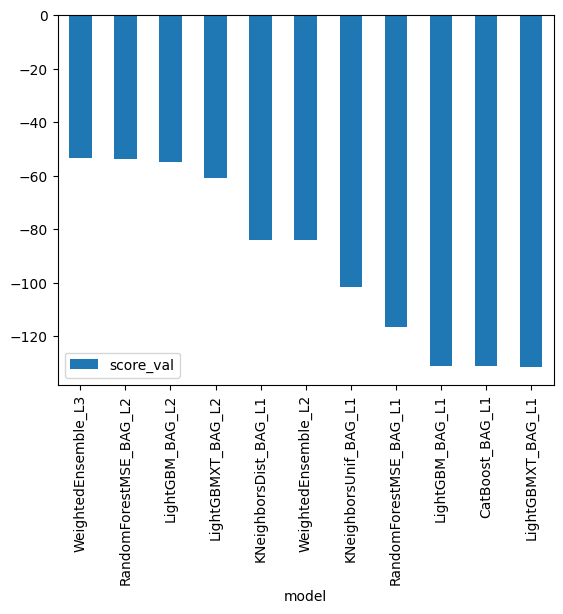

In [64]:
predictor.leaderboard(silent=True).plot(kind="bar", x="model", y="score_val")

In [65]:
# How many negative values do we have?
(predictions < 0).sum()

0

In [66]:
# Set them to zero
predictions = predictions.clip(lower = 0)

### Set predictions to submission dataframe, save, and submit

In [67]:
submission["count"] = predictions
submission.to_csv("submission.csv", index=False)

In [68]:
!kaggle competitions submit -c bike-sharing-demand -f submission.csv -m "first raw submission"


100% 188k/188k [00:00<00:00, 372kB/s]
Successfully submitted to Bike Sharing Demand

#### View submission via the command line or in the web browser under the competition's page - `My Submissions`

In [69]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                        description           status                     publicScore  privateScore  
---------------------------  --------------------------  --------------------  -------------------------  -----------  ------------  
submission.csv               2025-06-09 07:43:35.327000  first raw submission  SubmissionStatus.COMPLETE  1.80401      1.80401       
submission_new_features.csv  2025-06-09 07:30:02.100000  new features          SubmissionStatus.COMPLETE  0.62110      0.62110       
submission.csv               2025-06-09 07:03:07.100000  first raw submission  SubmissionStatus.COMPLETE  1.80400      1.80400       
submission.csv               2025-06-09 07:01:47.630000  first raw submission  SubmissionStatus.COMPLETE  1.80400      1.80400       


[link text](https://)#### Initial score of `1.80400`

## Step 4: Exploratory Data Analysis and Creating an additional feature
* Any additional feature will do, but a great suggestion would be to separate out the datetime into hour, day, or month parts.

array([[<Axes: title={'center': 'datetime'}>,
        <Axes: title={'center': 'season'}>,
        <Axes: title={'center': 'holiday'}>],
       [<Axes: title={'center': 'workingday'}>,
        <Axes: title={'center': 'weather'}>,
        <Axes: title={'center': 'temp'}>],
       [<Axes: title={'center': 'atemp'}>,
        <Axes: title={'center': 'humidity'}>,
        <Axes: title={'center': 'windspeed'}>],
       [<Axes: title={'center': 'casual'}>,
        <Axes: title={'center': 'registered'}>,
        <Axes: title={'center': 'count'}>]], dtype=object)

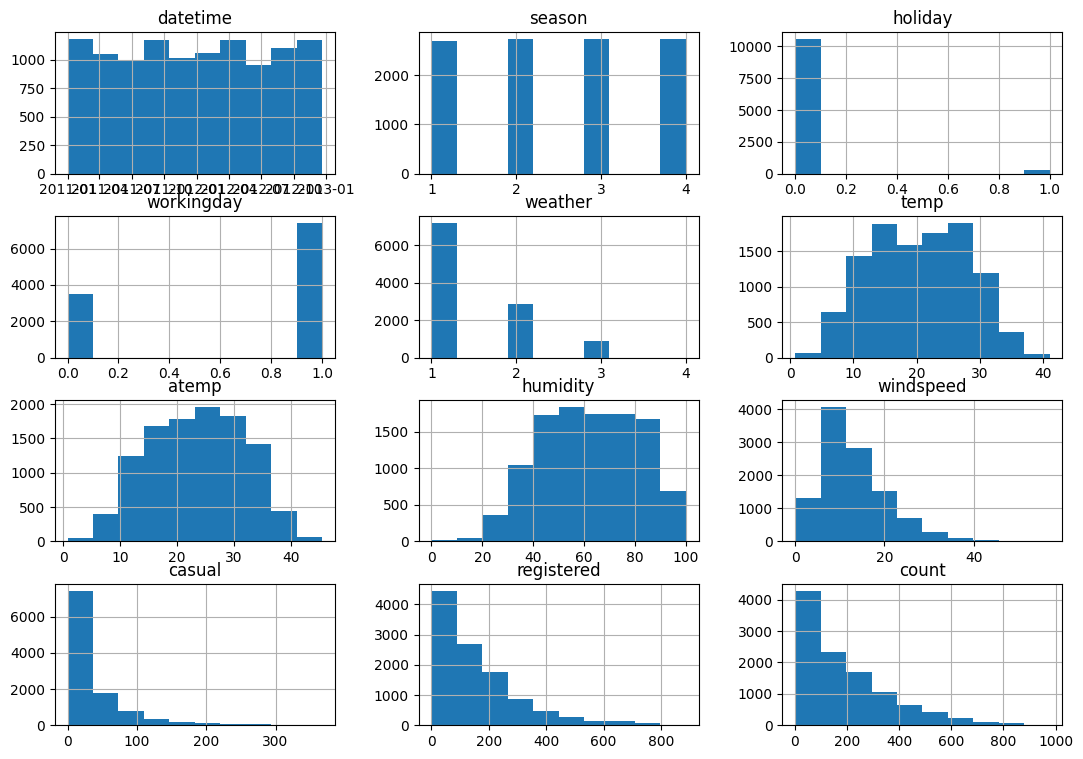

In [70]:
# Create a histogram of all features to show the distribution of each one relative to the data. This is part of the exploritory data analysis
train.hist(figsize=(13, 9))

In [71]:
# create a new feature
train['datetime'] = pd.to_datetime(train['datetime'])
test['datetime'] = pd.to_datetime(test['datetime'])

train['hour'] = train['datetime'].dt.hour
train['day'] = train['datetime'].dt.day
train['month'] = train['datetime'].dt.month

test['hour'] = test['datetime'].dt.hour
test['day'] = test['datetime'].dt.day
test['month'] = test['datetime'].dt.month

## Make category types for these so models know they are not just numbers
* AutoGluon originally sees these as ints, but in reality they are int representations of a category.
* Setting the dtype to category will classify these as categories in AutoGluon.

In [72]:
train["season"] = train["season"].astype("category")
train["weather"] = train["weather"].astype("category")
test["season"] = test["season"].astype("category")
test["weather"] = test["weather"].astype("category")

In [73]:
# View are new feature
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,day,month
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0,1,1
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2,1,1
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3,1,1
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4,1,1


array([[<Axes: title={'center': 'datetime'}>,
        <Axes: title={'center': 'holiday'}>,
        <Axes: title={'center': 'workingday'}>,
        <Axes: title={'center': 'temp'}>],
       [<Axes: title={'center': 'atemp'}>,
        <Axes: title={'center': 'humidity'}>,
        <Axes: title={'center': 'windspeed'}>,
        <Axes: title={'center': 'casual'}>],
       [<Axes: title={'center': 'registered'}>,
        <Axes: title={'center': 'count'}>,
        <Axes: title={'center': 'hour'}>,
        <Axes: title={'center': 'day'}>],
       [<Axes: title={'center': 'month'}>, <Axes: >, <Axes: >, <Axes: >]],
      dtype=object)

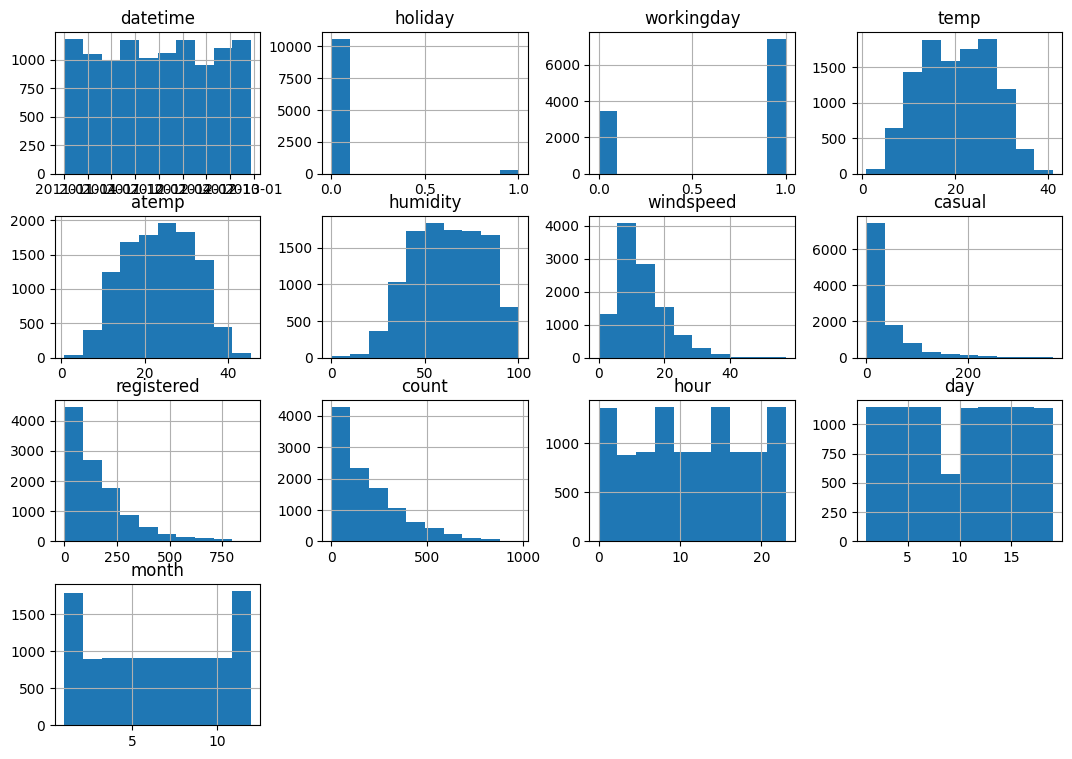

In [74]:
# View histogram of all features again now with the hour feature
train.hist(figsize=(13, 9))

## Step 5: Rerun the model with the same settings as before, just with more features

In [75]:
predictor_new_features = TabularPredictor(
    label="count",
    eval_metric="root_mean_squared_error"
).fit(
    train_data=train.drop(columns=["casual", "registered"]),
    time_limit=600,
    presets="best_quality"
)

No path specified. Models will be saved in: "AutogluonModels/ag-20250609_074342"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.3.1
Python Version:     3.11.13
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Sun Mar 30 16:01:29 UTC 2025
CPU Count:          2
Memory Avail:       10.07 GB / 12.67 GB (79.5%)
Disk Space Avail:   64.17 GB / 107.72 GB (59.6%)
Presets specified: ['best_quality']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
DyStack is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
	This is used to identify the optimal `num_stack_levels` value. Copies of AutoGluon will be

In [76]:
predictor_new_features.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model   score_val              eval_metric  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3  -30.437235  root_mean_squared_error      32.596265  395.949508                0.001055           0.033690            3       True         11
1          LightGBM_BAG_L2  -30.767335  root_mean_squared_error      29.519304  293.697780                0.450336          39.686559            2       True          9
2        LightGBMXT_BAG_L2  -31.099344  root_mean_squared_error      31.392601  306.432331                2.323633          52.421110            2       True          8
3   RandomForestMSE_BAG_L2  -31.729549  root_mean_squared_error      29.821241  303.808149                0.752273          49.796928            2       True         10
4      WeightedEnsemble_L2  -32.419553  root_mean_squared_error      28.893923  199.427948   

/usr/local/lib/python3.11/dist-packages/autogluon/core/utils/plots.py:169: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L2': 'StackerEnsembleModel_RF',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': -101.54619908446061,
  'KNeighborsDist_BAG_L1': -84.12506123181602,
  'LightGBMXT_BAG_L1': -34.51903091052072,
  'LightGBM_BAG_L1': -33.916920183145294,
  'RandomForestMSE_BAG_L1': -38.40890681984868,
  'CatBoost_BAG_L1': -38.5787559640049,
  'WeightedEnsemble_L2': -32.419552668761895,
  'LightGBMXT_BAG_L2': -31.099344426500608,
  'LightGBM_BAG_L2': -30.767334

In [77]:
predictions_new.describe()

,count
count,6493.000000
mean,163.248993
std,145.037384
min,1.968603
25%,49.522751
50%,125.266953
75%,235.361221
max,812.822754


<Axes: xlabel='model'>

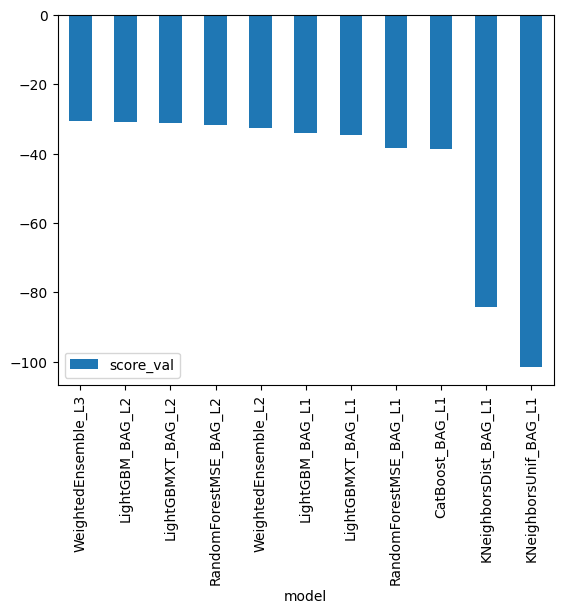

In [78]:
predictor_new_features.leaderboard(silent=True)
predictor_new_features.leaderboard(silent=True).plot(kind="bar", x="model", y="score_val")

In [79]:
# Remember to set all negative values to zero
predictions_new = predictor_new_features.predict(test)
predictions_new = predictions_new.clip(lower=0)

In [80]:
# Same submitting predictions
submission_new_features = test[["datetime"]].copy()
submission_new_features["count"] = predictions_new
submission_new_features.to_csv("submission_new_features.csv", index=False)

In [81]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_features.csv -m "new features"

100% 188k/188k [00:00<00:00, 376kB/s]
Successfully submitted to Bike Sharing Demand

In [82]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                        description           status                     publicScore  privateScore  
---------------------------  --------------------------  --------------------  -------------------------  -----------  ------------  
submission_new_features.csv  2025-06-09 07:55:41.263000  new features          SubmissionStatus.COMPLETE  0.61001      0.61001       
submission.csv               2025-06-09 07:43:35.327000  first raw submission  SubmissionStatus.COMPLETE  1.80401      1.80401       
submission_new_features.csv  2025-06-09 07:30:02.100000  new features          SubmissionStatus.COMPLETE  0.62110      0.62110       
submission.csv               2025-06-09 07:03:07.100000  first raw submission  SubmissionStatus.COMPLETE  1.80400      1.80400       


#### New Score of `0.61001`

## Step 6: Hyper parameter optimization
* There are many options for hyper parameter optimization.
* Options are to change the AutoGluon higher level parameters or the individual model hyperparameters.
* The hyperparameters of the models themselves that are in AutoGluon. Those need the `hyperparameter` and `hyperparameter_tune_kwargs` arguments.

In [84]:
predictor_new_hpo = TabularPredictor(
    label="count",
    eval_metric="root_mean_squared_error"
).fit(
    train_data=train.drop(columns=["casual", "registered"]),
    time_limit=600,
    presets="best_quality",
    hyperparameters={
        'GBM': {'num_boost_round': 5000, 'learning_rate': 0.05},
        'CAT': {'iterations': 5000, 'learning_rate': 0.05},
        'XGB': {'n_estimators': 5000, 'learning_rate': 0.05},
        'RF': {'n_estimators': 300},
    },
    hyperparameter_tune_kwargs="auto"
)

No path specified. Models will be saved in: "AutogluonModels/ag-20250609_080025"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.3.1
Python Version:     3.11.13
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Sun Mar 30 16:01:29 UTC 2025
CPU Count:          2
Memory Avail:       9.79 GB / 12.67 GB (77.2%)
Disk Space Avail:   63.47 GB / 107.72 GB (58.9%)
Presets specified: ['best_quality']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
DyStack is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
	This is used to identify the optimal `num_stack_levels` value. Copies of AutoGluon will be 

In [85]:
predictor_new_hpo.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                 model  score_val              eval_metric  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0  WeightedEnsemble_L3 -32.817048  root_mean_squared_error      15.791388  375.331457                0.000704           0.030950            3       True         10
1  WeightedEnsemble_L2 -32.922286  root_mean_squared_error      14.517297  241.647237                0.000736           0.016198            2       True          5
2   CatBoost_BAG_L2/T1 -33.295371  root_mean_squared_error      14.732358  293.244345                0.215797          51.613306            2       True          8
3   LightGBM_BAG_L2/T1 -33.499543  root_mean_squared_error      14.692313  284.686204                0.175752          43.055166            2       True          6
4    XGBoost_BAG_L2/T1 -33.654880  root_mean_squared_error      14.838302  278.055504                0.321742         

/usr/local/lib/python3.11/dist-packages/autogluon/core/utils/plots.py:169: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


{'model_types': {'LightGBM_BAG_L1/T1': 'StackerEnsembleModel_LGB',
  'RandomForest_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1/T1': 'StackerEnsembleModel_CatBoost',
  'XGBoost_BAG_L1/T1': 'StackerEnsembleModel_XGBoost',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBM_BAG_L2/T1': 'StackerEnsembleModel_LGB',
  'RandomForest_BAG_L2': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L2/T1': 'StackerEnsembleModel_CatBoost',
  'XGBoost_BAG_L2/T1': 'StackerEnsembleModel_XGBoost',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'LightGBM_BAG_L1/T1': -33.916920183145294,
  'RandomForest_BAG_L1': -38.40890681984868,
  'CatBoost_BAG_L1/T1': -38.40594531235512,
  'XGBoost_BAG_L1/T1': -34.65863052497805,
  'WeightedEnsemble_L2': -32.92228636597568,
  'LightGBM_BAG_L2/T1': -33.49954266675532,
  'RandomForest_BAG_L2': -33.89015793081518,
  'CatBoost_BAG_L2/T1': -33.29537058023114,
  'XGBoost_BAG_L2/T1': -33.65487960989552,
  'WeightedEnsemble_L3': -32.8170

In [86]:
# Remember to set all negative values to zero
predictions_hpo = predictor_new_hpo.predict(test)
predictions_hpo = predictions_hpo.clip(lower=0)

In [87]:
predictions_hpo.describe()

,count
count,6493.000000
mean,192.436523
std,174.315979
min,0.000000
25%,46.684948
50%,150.844635
75%,284.241821
max,893.818970


In [ ]:
predictor_new_hpo.leaderboard(silent=True).plot(kind="bar",x="model",y="score_val")

In [88]:
# Same submitting predictions
submission_new_hpo = test[["datetime"]].copy()
submission_new_hpo["count"] = predictions_hpo
submission_new_hpo.to_csv("submission_new_hpo.csv", index=False)

In [89]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_hpo.csv -m "new features with hyperparameters"

100% 188k/188k [00:00<00:00, 361kB/s]
Successfully submitted to Bike Sharing Demand

In [90]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                        description                        status                     publicScore  privateScore  
---------------------------  --------------------------  ---------------------------------  -------------------------  -----------  ------------  
submission_new_hpo.csv       2025-06-09 08:10:51.923000  new features with hyperparameters  SubmissionStatus.COMPLETE  0.49175      0.49175       
submission_new_features.csv  2025-06-09 07:55:41.263000  new features                       SubmissionStatus.COMPLETE  0.61001      0.61001       
submission.csv               2025-06-09 07:43:35.327000  first raw submission               SubmissionStatus.COMPLETE  1.80401      1.80401       
submission_new_features.csv  2025-06-09 07:30:02.100000  new features                       SubmissionStatus.COMPLETE  0.62110      0.62110       



#### New Score of `0.49175`

## Step 7: Write a Report
### Refer to the markdown file for the full report
### Creating plots and table for report

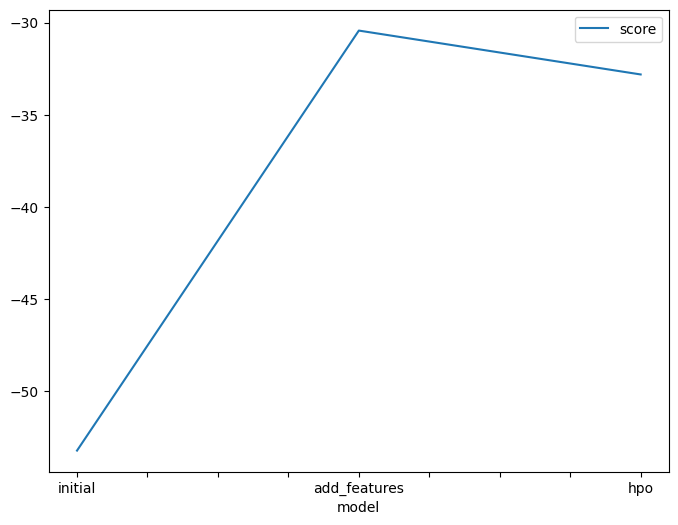

In [92]:
# Taking the top model score from each training run and creating a line plot to show improvement
# You can create these in the notebook and save them to PNG or use some other tool (e.g. google sheets, excel)
score_initial = predictor.leaderboard(silent=True).iloc[0]["score_val"]
score_add_features = predictor_new_features.leaderboard(silent=True).iloc[0]["score_val"]
score_hpo = predictor_new_hpo.leaderboard(silent=True).iloc[0]["score_val"]
fig = pd.DataFrame(
    {
        "model": ["initial", "add_features", "hpo"],
        "score": [score_initial, score_add_features, score_hpo]
    }
).plot(x="model", y="score", figsize=(8, 6)).get_figure()
fig.savefig('model_train_score.png')

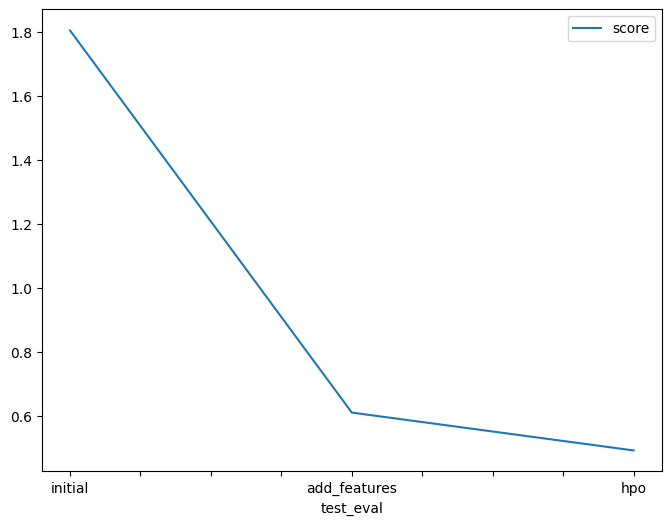

In [93]:
# Take the 3 kaggle scores and creating a line plot to show improvement
fig = pd.DataFrame(
    {
        "test_eval": ["initial", "add_features", "hpo"],
        "score": [1.80401, 0.61001, 0.49175]
    }
).plot(x="test_eval", y="score", figsize=(8, 6)).get_figure()
fig.savefig('model_test_score.png')

### Hyperparameter table

In [94]:
# The 3 hyperparameters we tuned with the kaggle score as the result
pd.DataFrame({
    "model": ["initial", "add_features", "hpo"],
    "hpo1": ["default", "default", "num_boost_round = 10000"],
    "hpo2": ["default", "default", "learning_rate = 0.05"],
    "hpo3": ["default", "default", "early_stopping = auto"],
    "score": [1.80401, 0.61001, 0.49175]
})

,model,hpo1,hpo2,hpo3,score
0,initial,default,default,default,1.80401
1,add_features,default,default,default,0.61001
2,hpo,num_boost_round = 10000,learning_rate = 0.05,early_stopping = auto,0.49175
